# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [147]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [148]:
# Load Data
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [149]:
data.shape

(6019, 14)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#### Mileage ,Engine, Power, Seats, New_Price 결측치가 있음을 확인함

In [151]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000     

In [152]:
len(data['Name'].unique())

1876

##결측치 처리



Name 이 같은 차량의 결측치를 동일하게 채움

- Mileage, Engine, Power, Seats - null값 제거
- New_Price: 중고차와 새차의 평균적으로 몇배정도 차이가 나는지 확인후 적용

In [153]:
columns_to_fill = ['Mileage', 'Engine', 'Power', 'Seats', 'New_Price']
def convert_to_number(x):
    try:
        return float(x.split()[0])
    except:
        return x

columns_to_convert = ['Mileage', 'Engine', 'Power']

for column in columns_to_fill:
    data[column].fillna(data.groupby('Name')[column].transform('first'), inplace=True)



In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5988 non-null   object 
 10  Power              5988 non-null   object 
 11  Seats              5983 non-null   float64
 12  New_Price          1012 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [155]:
data['New_Price'].unique()

array([None, '8.61 Lakh', '10.41 Lakh', '21 Lakh', '10.65 Lakh',
       '32.01 Lakh', '47.87 Lakh', '10.57 Lakh', '12.33 Lakh',
       '11.12 Lakh', '23.64 Lakh', '18.64 Lakh', '7.13 Lakh', '7.92 Lakh',
       '19.34 Lakh', '49.14 Lakh', '11.81 Lakh', '16.65 Lakh',
       '6.67 Lakh', '6.45 Lakh', '6.41 Lakh', '27 Lakh', '5.13 Lakh',
       '54.43 Lakh', '9.51 Lakh', '9.96 Lakh', '14.44 Lakh', '4.53 Lakh',
       '95.04 Lakh', '13.49 Lakh', '1.28 Cr', '60.88 Lakh', '7.39 Lakh',
       '69.47 Lakh', '8.78 Lakh', '12.74 Lakh', '10.52 Lakh',
       '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '4.74 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '4.29 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh',
       '1.04 Cr', '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '1

In [156]:
def convert_price(price):
    if 'Lakh' in str(price):
        return float(price.replace(' Lakh', '')) * 100000
    elif 'Cr' in str(price):
        return float(price.replace(' Cr', '')) * 10000000

In [157]:
# 'New_Price'와 'Price' 열의 결측치를 제거하고 숫자로 변환
data['New_Price'] = data['New_Price'].dropna().apply(convert_price)



In [158]:
# 'New_Price'와 'Price'의 비율을 계산하고 새로운 열 'Price_Ratio'에 저장
data['Price_Ratio'] = data['New_Price'] / data['Price'] *100000

# 'Price_Ratio'의 평균을 계산
average_ratio = data['Price_Ratio'].mean()

# 'New_Price'의 결측치를 'Price'와 평균 배율을 곱한 값으로 채워줌
data['New_Price'].fillna(data['Price'] * average_ratio, inplace=True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5988 non-null   object 
 10  Power              5988 non-null   object 
 11  Seats              5983 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
 14  Price_Ratio        1012 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 705.5+ KB


In [160]:
# 결측치 포함하는 행(인스턴스) drop하는 경우: Mileage, Engine, Power, Seats
cleaned_data = data.drop(index=data[data['Mileage'].isna() | data['Engine'].isna() | data['Power'].isna() | data['Seats'].isna()].index.tolist())


In [161]:
cleaned_data = cleaned_data.drop(columns='Price_Ratio')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5981 non-null   int64  
 1   Name               5981 non-null   object 
 2   Location           5981 non-null   object 
 3   Year               5981 non-null   int64  
 4   Kilometers_Driven  5981 non-null   int64  
 5   Fuel_Type          5981 non-null   object 
 6   Transmission       5981 non-null   object 
 7   Owner_Type         5981 non-null   object 
 8   Mileage            5981 non-null   object 
 9   Engine             5981 non-null   object 
 10  Power              5981 non-null   object 
 11  Seats              5981 non-null   float64
 12  New_Price          5981 non-null   float64
 13  Price              5981 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 700.9+ KB


# 이상치 처리

In [163]:
def outlier_by_Zscore(data):
  # z_score 구하기
  mean = np.mean(data)
  std = np.std(data)
  z_scores = (data - mean) / std

  # outlier로 처리할 임계 z_score 값을 3으로 설정
  # outlier 확인
  z_score_outliers = z_scores[(z_scores > 3) | (z_scores < -3)]

  return z_score_outliers

In [164]:
outliers = outlier_by_Zscore(cleaned_data)
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Engine             0 non-null      object 
 1   Fuel_Type          0 non-null      object 
 2   Kilometers_Driven  7 non-null      float64
 3   Location           0 non-null      object 
 4   Mileage            0 non-null      object 
 5   Name               0 non-null      object 
 6   New_Price          158 non-null    float64
 7   Owner_Type         0 non-null      object 
 8   Power              0 non-null      object 
 9   Price              149 non-null    float64
 10  Seats              159 non-null    float64
 11  Transmission       0 non-null      object 
 12  Unnamed: 0         0 non-null      float64
 13  Year               47 non-null     float64
dtypes: float64(6), object(8)
memory usage: 700.9+ KB


In [165]:
# 이상치가 존재하는 인스턴스를 제거
cleaned_data = cleaned_data.drop(index=outliers.dropna(how='all', axis=0).index.tolist())

# 결과 확인
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5584 non-null   int64  
 1   Name               5584 non-null   object 
 2   Location           5584 non-null   object 
 3   Year               5584 non-null   int64  
 4   Kilometers_Driven  5584 non-null   int64  
 5   Fuel_Type          5584 non-null   object 
 6   Transmission       5584 non-null   object 
 7   Owner_Type         5584 non-null   object 
 8   Mileage            5584 non-null   object 
 9   Engine             5584 non-null   object 
 10  Power              5584 non-null   object 
 11  Seats              5584 non-null   float64
 12  New_Price          5584 non-null   float64
 13  Price              5584 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 654.4+ KB


In [167]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Price_Ratio
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,3.297140e+10,1.75,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.355100e+11,12.50,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.610000e+05,4.50,1.913333e+10
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.041000e+06,6.00,1.735000e+10
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,3.342358e+11,17.74,NaN


In [168]:
# 단위(km/kg, kmpl, CC, bhp) 제거
for col in ['Mileage', 'Engine', 'Power']:
  cleaned_data[col] = cleaned_data[col].str.replace(r'(km/kg|kmpl|CC|bhp)', '', regex=True) # 주의 r'km/kg | kmpl|'처럼 OR 기호 사이에 띄어쓰기 하지 말 것
  # cleaned_data[col] = pd.to_numeric(cleaned_data[col]) # "null " 발견

  cleaned_data = cleaned_data.drop(index=cleaned_data[cleaned_data[col] == "null "].index.tolist())

  cleaned_data[col] = pd.to_numeric(cleaned_data[col])

# 결과 확인
cleaned_data.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,3.297140e+10,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,2.355100e+11,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.610000e+05,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,1.041000e+06,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,3.342358e+11,17.74


# 인코딩

In [171]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import re

import warnings
warnings.filterwarnings(action='ignore')

In [169]:
cat_data = cleaned_data.select_dtypes(include='object').columns.tolist()
cat_data

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [172]:
encoder = LabelEncoder()

for col in cat_data:
  cleaned_data[col] = encoder.fit_transform(cleaned_data[col])

# 결과 확인
cleaned_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1056,9,2010,72000,0,1,0,26.60,998,58.16,5.0,3.297140e+10,1.75
1,1,461,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,2.355100e+11,12.50
2,2,435,2,2011,46000,3,1,0,18.20,1199,88.70,5.0,8.610000e+05,4.50
3,3,927,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,1.041000e+06,6.00
4,4,21,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,3.342358e+11,17.74


In [173]:
# 인덱스 열 (Unnamed: 0) 제거
cleaned_data = cleaned_data.drop('Unnamed: 0', axis=1)

# 학습/테스트 데이터셋 분리

In [174]:
X = cleaned_data.drop('Price', axis=1) # Independet variable
y = cleaned_data['Price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [175]:
# Scaling
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # 학습 데이터셋에 대해 fit한 scaler로 테스트 데이터셋을 스케일링

# 결과 확인
X_train.head(3), X_test.head(3)

(       Name  Location      Year  Kilometers_Driven  Fuel_Type  Transmission  \
 0 -0.835670 -1.929510 -1.505563           1.037532   1.047183      0.617740   
 1  1.201392  1.123842  0.495782           0.007583   1.047183     -1.618804   
 2  0.532410 -1.250988 -2.506235          -0.495177   1.047183      0.617740   
 
    Owner_Type   Mileage    Engine     Power     Seats  New_Price  
 0   -0.446707 -1.183158  0.434698  0.446808 -0.324966  -0.300965  
 1   -0.446707 -1.136213  0.432849  1.029179 -0.324966   0.958827  
 2   -0.446707  0.084350 -1.046295 -0.873233 -0.324966  -0.615913  ,
        Name  Location      Year  Kilometers_Driven  Fuel_Type  Transmission  \
 0 -0.044076  0.445319  0.495782           0.362358  -0.929944     -1.618804   
 1 -0.829216 -0.233204 -0.838448          -0.025981   1.047183      0.617740   
 2 -0.934619  1.123842 -0.171333          -0.151100   1.047183     -1.618804   
 
    Owner_Type   Mileage    Engine     Power     Seats  New_Price  
 0   -0.446707 

In [176]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3845, 12), (1649, 12), (3845,), (1649,))

In [177]:
# Scikit Learn module
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1은 scikit learn이 자동으로 추가해준다.

#Parameter
theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = pd.Series(theta, name='theta by SkLearn')
parameter_df

0     8.142263
1     0.089508
2    -0.306929
3     1.859778
4    -0.560076
5    -1.307553
6    -1.044656
7    -0.108609
8    -0.845005
9    -0.893069
10    3.493593
11    0.066850
12    2.504473
Name: theta by SkLearn, dtype: float64

In [178]:
y_pred = lin_reg.predict(X_test) # sklearn linear regression 모델을 이용한 예측값

In [179]:
# MSE
MSE = mean_squared_error(y_pred, y_test)

# R^2
R_squared = lin_reg.score(X_test, y_test)

print(f'MSE: {MSE}\nR_squred: {R_squared}')

MSE: 12.406107336718136
R_squred: 0.764529644367156


# 회귀진단

- 독립변수와 종속변수 간의 선형 관계
- 오차의 정규성
- 오차의 등분산성
- 오차의 독립성
- 다중공선성

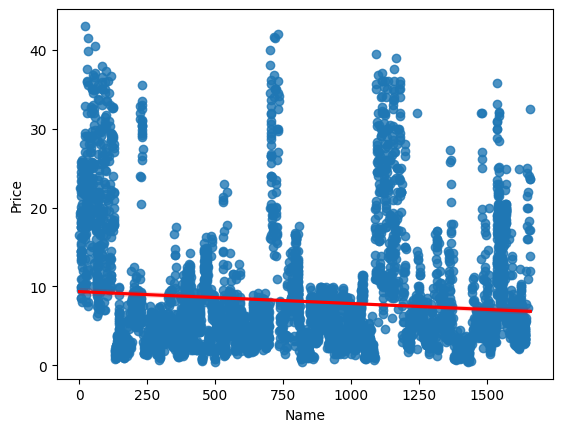

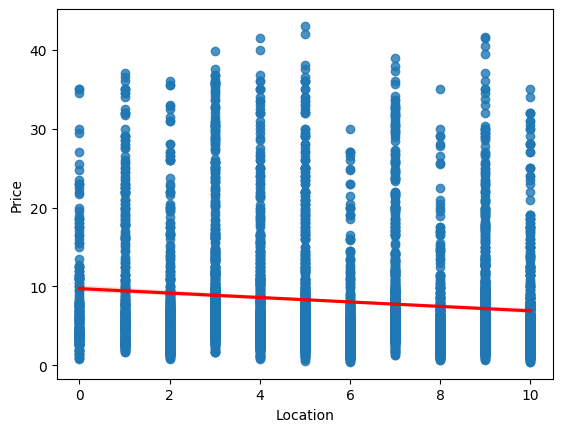

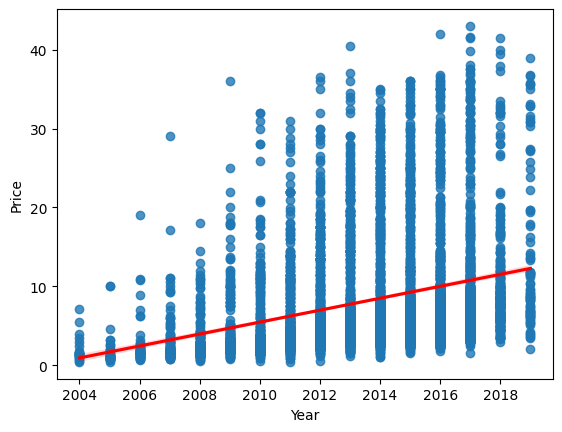

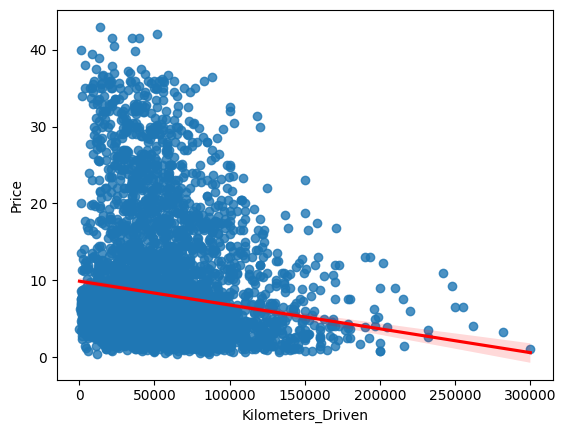

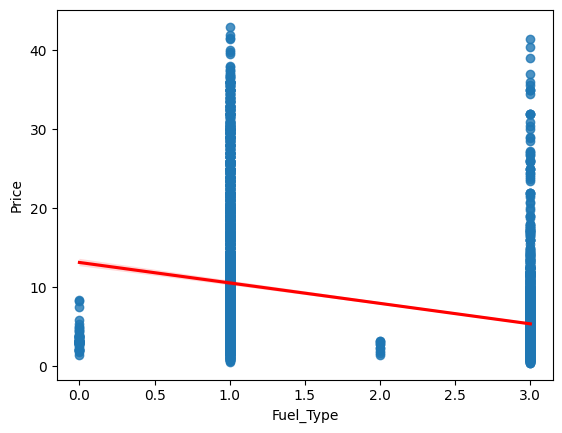

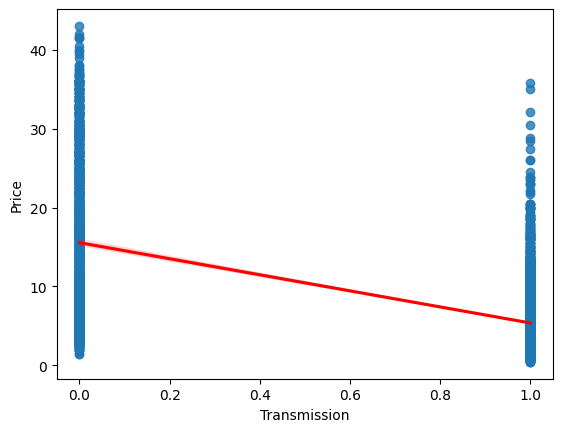

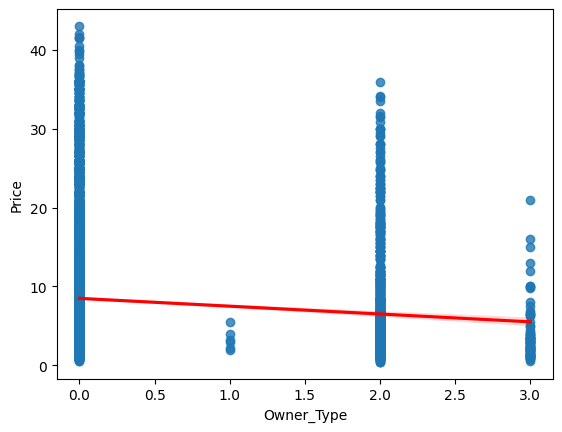

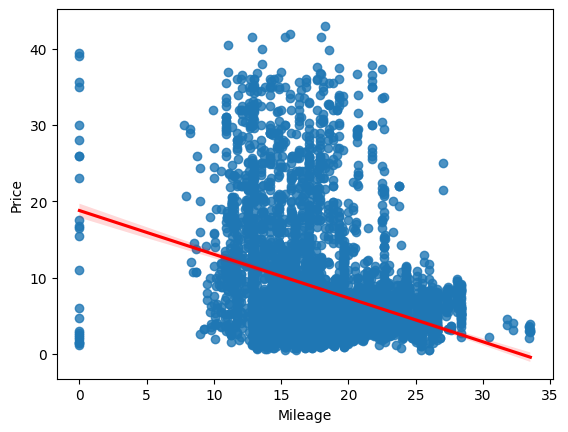

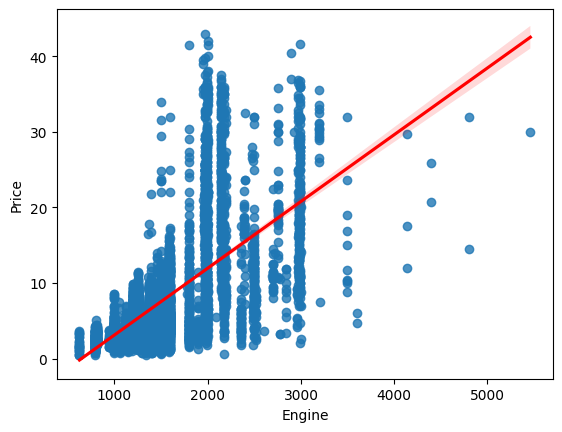

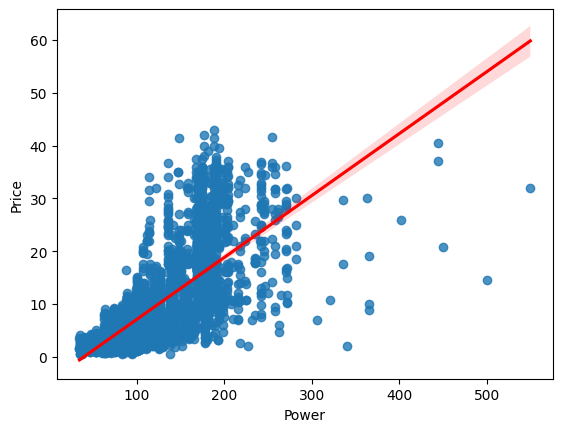

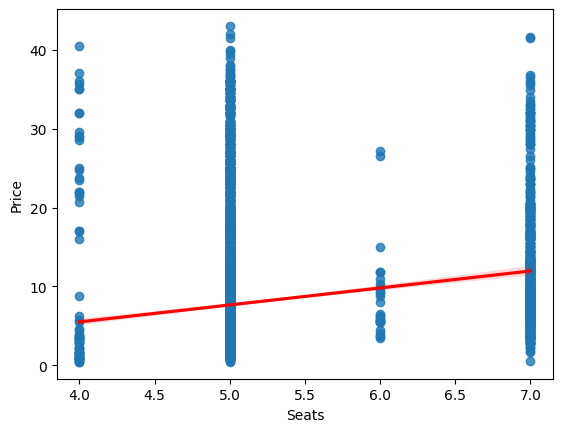

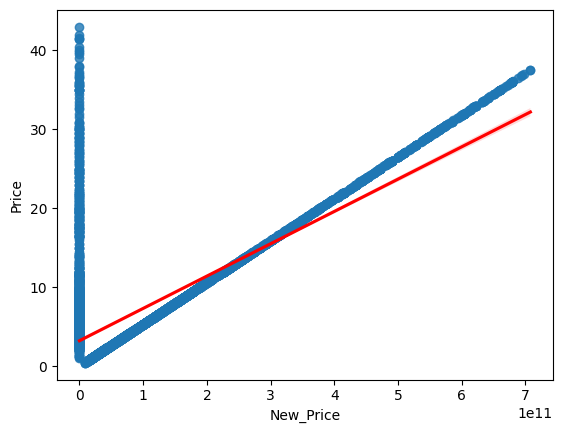

In [180]:
for col in X.columns:
    sns.regplot(x=X[col], y=y, line_kws={"color": "red"})
    plt.show()

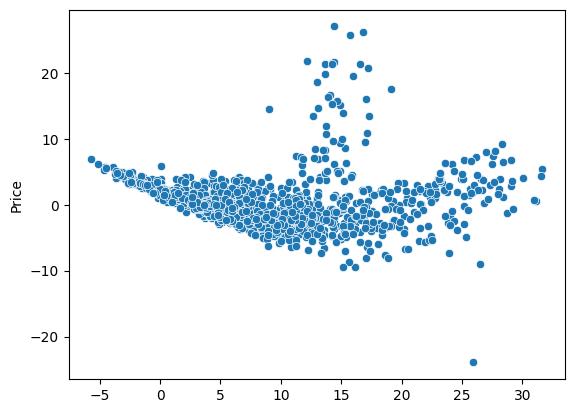

In [181]:

# 등분산성 확인
f = sns.scatterplot(y=(y_test - y_pred), x = y_pred)

In [182]:
# 다중공선성1
# VTR이 10 미만이므로 다중 공선성 없다고 판단
VTF = 1/(1- R_squared)
VTF

4.246819083924284

<Axes: >

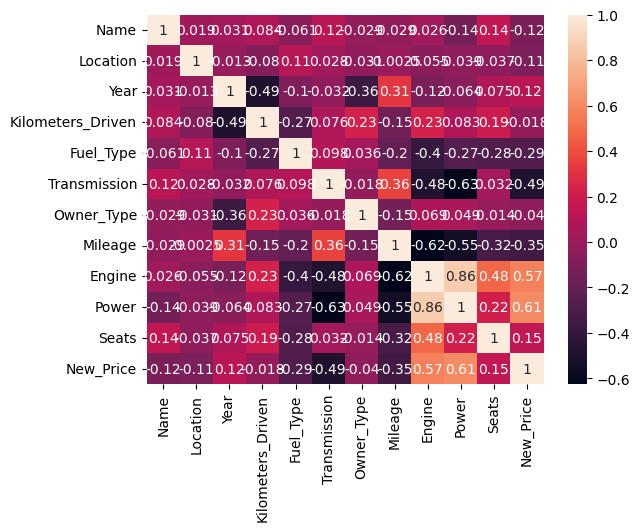

In [183]:
# 다중공선성2
# 상관계수 행렬 확인 결과, Engine과 Power의 상관이 높았다.
sns.heatmap(X.corr(), annot=True)

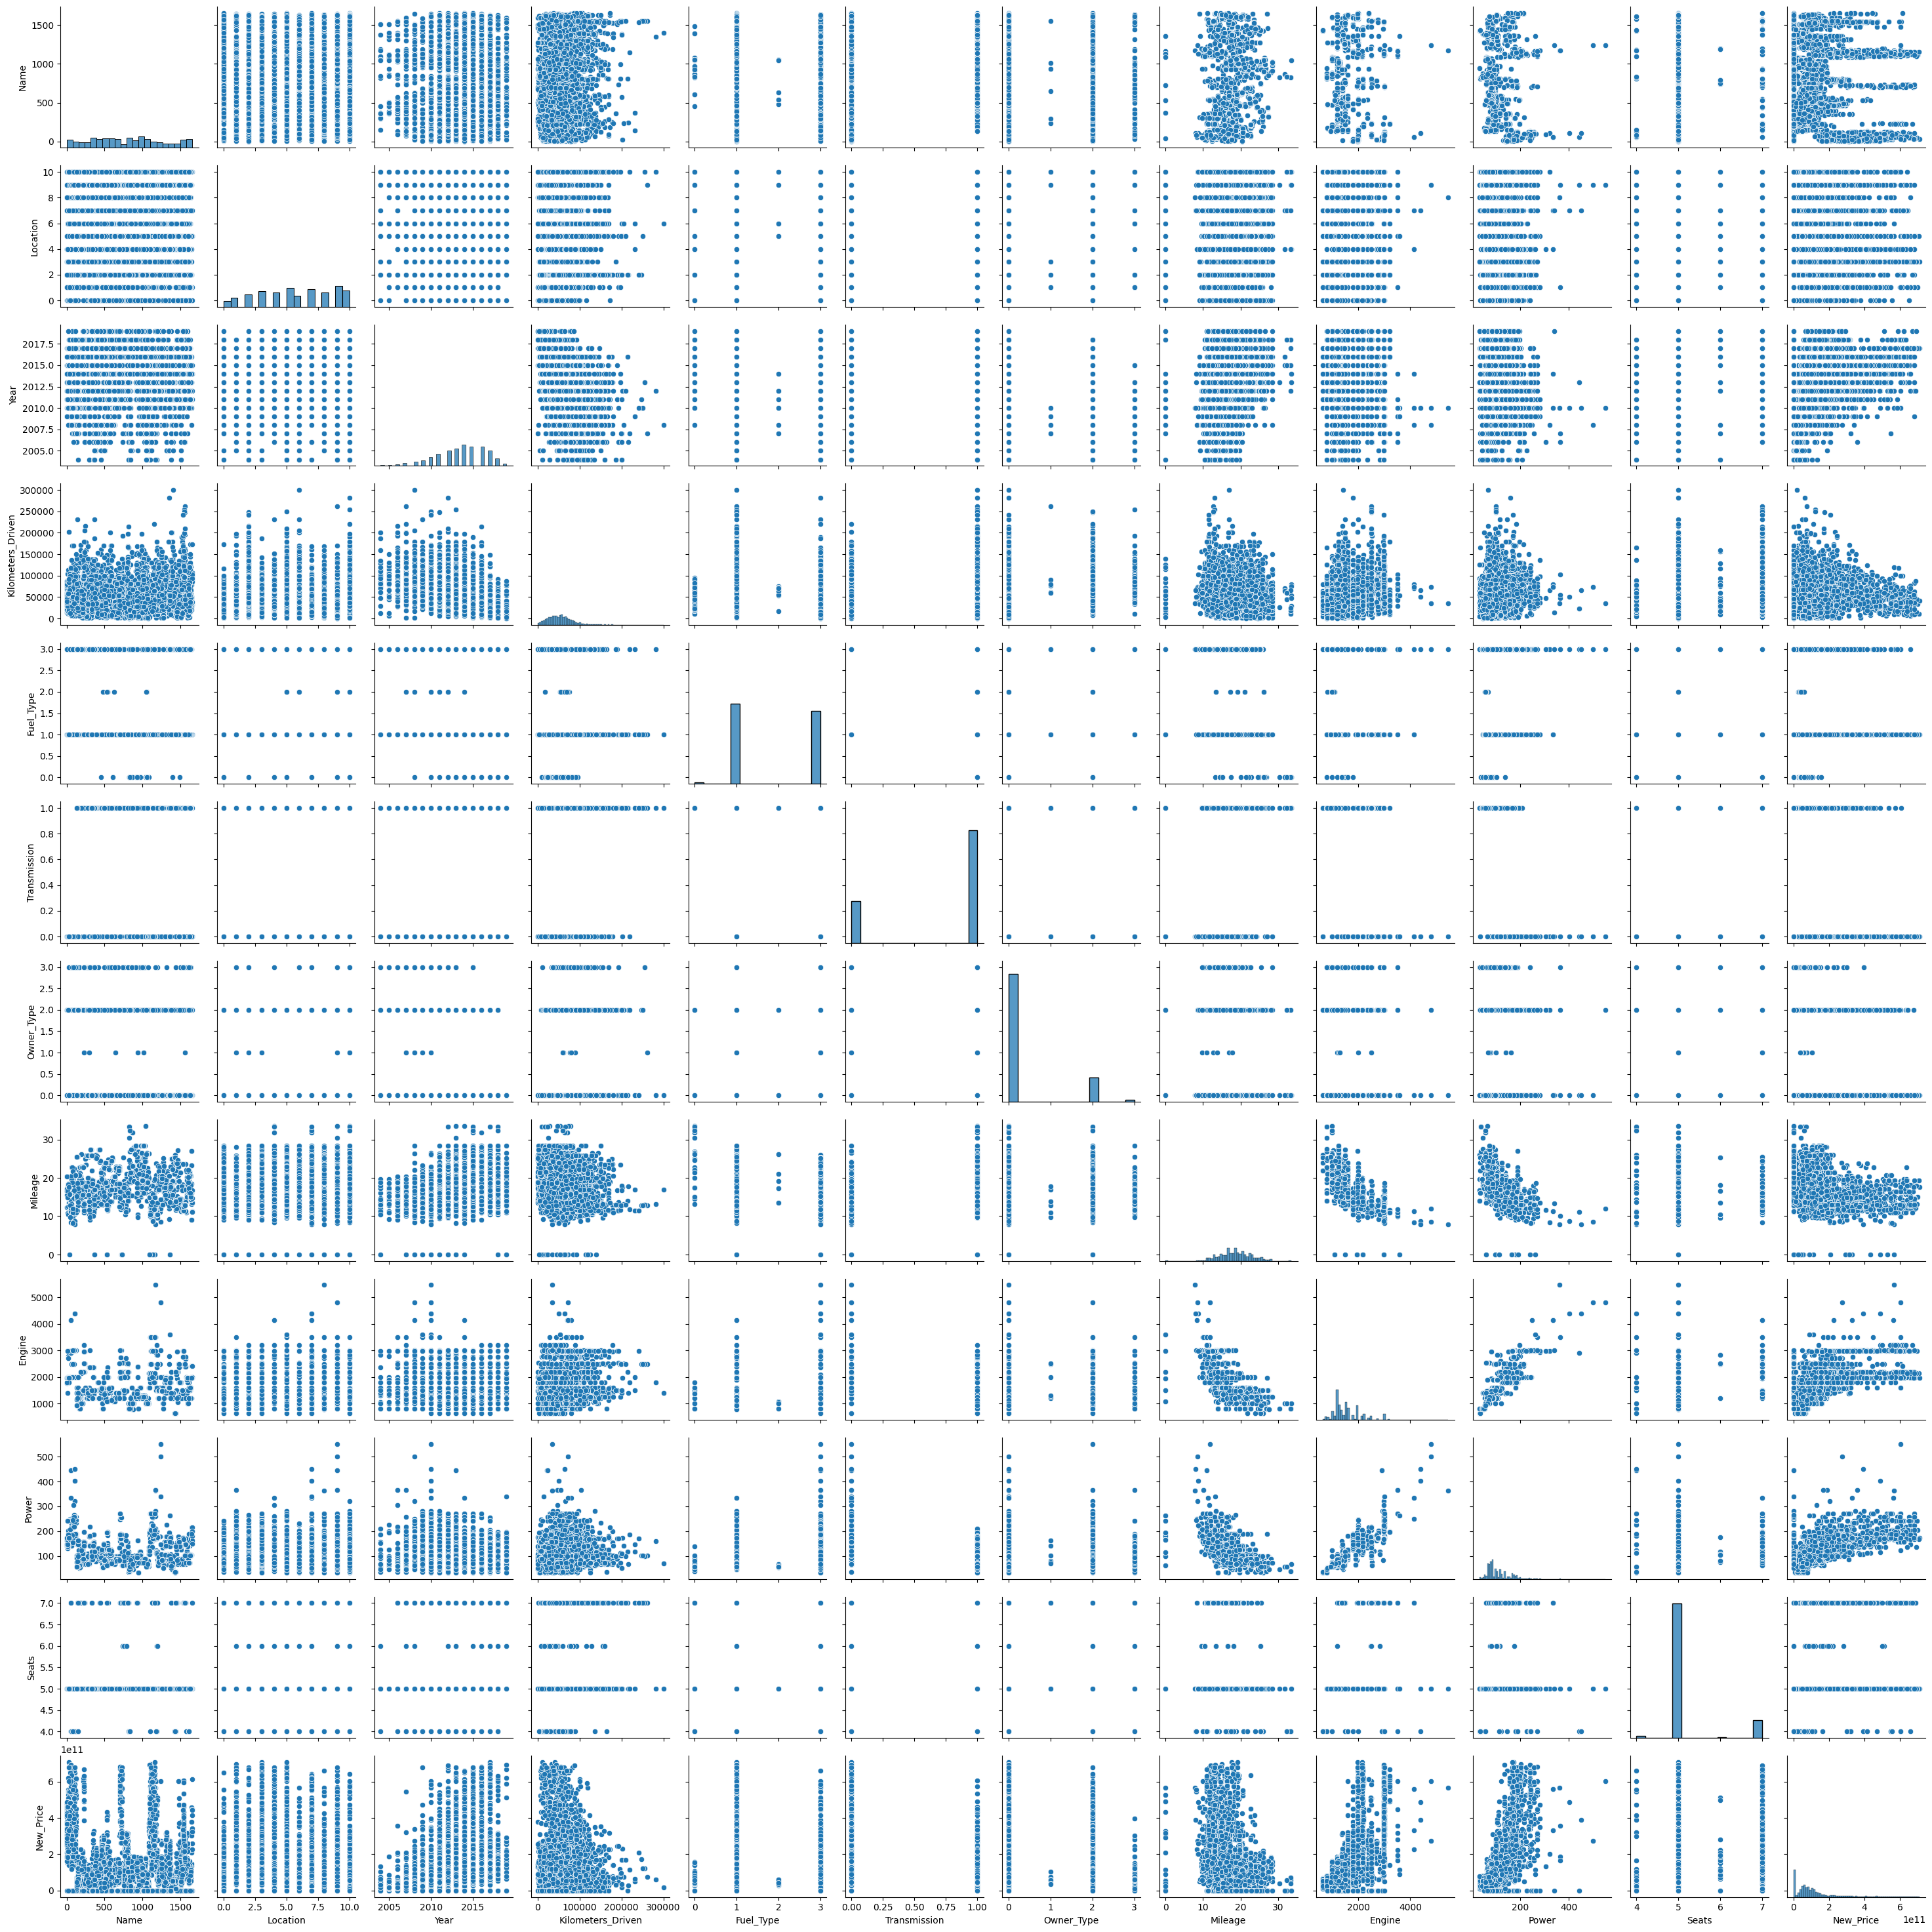

In [184]:
# 다중공선성 3
# 산점도 행렬 확인 결과, Engine-Power, Mileage-Engie, Mileage-Power 간 상관 관계가 있는 것을 발견했다.
sns.pairplot(X)